In [ ]:
# !pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [18]:
import torch
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import optuna
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'


# Playing with torch and stuff

In [ ]:
data = [[0,1,1,0,0,1,1],[0,1,1,0,0,1,1],[0,1,1,0,0,1,1],[0,1,1,0,0,1,1]]
x_data = torch.tensor(data)
print(x_data)
print(type(x_data))
print('dtype. ', x_data.dtype)
print('device ', x_data.device)

tensor([[0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1]])
<class 'torch.Tensor'>
dtype.  torch.int64
device  cpu


In [ ]:
#Set the tensor using GPU
x_gpu = torch.tensor(data, device = 'cuda')
print(x_gpu.dtype)
print(x_gpu.device)

RuntimeError: ignored

In [ ]:
shape = (10,5)

a = torch.rand(shape)
b = torch.ones(shape)
c = torch.zeros(shape)

print(a)
print(b)
print(c)

tensor([[0.8556, 0.7136, 0.4824, 0.0116, 0.8917],
        [0.8110, 0.3378, 0.2769, 0.1347, 0.5482],
        [0.3351, 0.8457, 0.9527, 0.9788, 0.3322],
        [0.4291, 0.0620, 0.2991, 0.3836, 0.3166],
        [0.9046, 0.6579, 0.7335, 0.1568, 0.6024],
        [0.7325, 0.3162, 0.3128, 0.5024, 0.5866],
        [0.7851, 0.1351, 0.7251, 0.9427, 0.6337],
        [0.1833, 0.2510, 0.6610, 0.5816, 0.6852],
        [0.3686, 0.5746, 0.0748, 0.3906, 0.7032],
        [0.4366, 0.4482, 0.6993, 0.8226, 0.9192]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0

In [ ]:
a = torch.tensor([[1,2,3,4],[4,5,6,7], [7,8,9,10]])
print(a)
b = torch.tensor([[7,8,9,4], [4,5,6,7], [1,2,3,4]])
print(b)
c = torch.tensor([[7,8,9,4,5], [4,5,6,7,8], [1,2,3,4,5]])
print(c)
print(a.shape)

c = torch.cat([a,b], dim = 1)
print(c)
print(c.shape)

d = torch.cat([a,b], dim = 0)
print(d)
print(d.shape)

#Note: when we concat with this dimension, other dimension has to be the same
e = torch.cat([a,c], dim = 1)
print(e)
print(e.shape)

# This gonna throw an error because dim 1 of a and c are not the same
# f = torch.cat([a,c], dim = 0)
# print(f)
# print(f.shape)



tensor([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10]])
tensor([[7, 8, 9, 4],
        [4, 5, 6, 7],
        [1, 2, 3, 4]])
tensor([[7, 8, 9, 4, 5],
        [4, 5, 6, 7, 8],
        [1, 2, 3, 4, 5]])
torch.Size([3, 4])
tensor([[ 1,  2,  3,  4,  7,  8,  9,  4],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 7,  8,  9, 10,  1,  2,  3,  4]])
torch.Size([3, 8])
tensor([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10],
        [ 7,  8,  9,  4],
        [ 4,  5,  6,  7],
        [ 1,  2,  3,  4]])
torch.Size([6, 4])
tensor([[ 1,  2,  3,  4,  1,  2,  3,  4,  7,  8,  9,  4],
        [ 4,  5,  6,  7,  4,  5,  6,  7,  4,  5,  6,  7],
        [ 7,  8,  9, 10,  7,  8,  9, 10,  1,  2,  3,  4]])
torch.Size([3, 12])


In [ ]:
a = torch.rand((3,4))
b = torch.rand((3,4))

#element wise, either * or tensor.mul(other)
print(a * b)
print(a.mul(b))

tensor([[0.0280, 0.2950, 0.3302, 0.8024],
        [0.0796, 0.0230, 0.1364, 0.2917],
        [0.3723, 0.1980, 0.0030, 0.0520]])
tensor([[0.0280, 0.2950, 0.3302, 0.8024],
        [0.0796, 0.0230, 0.1364, 0.2917],
        [0.3723, 0.1980, 0.0030, 0.0520]])


In [ ]:
#matrix multiplication is matmul or @

#this won't work because of dimension does not work ofr mat mul
# print(a@b)

c = torch.rand((4,3))
print(a@c)

tensor([[0.3284, 1.1790, 0.8035],
        [0.5102, 1.5713, 0.8226],
        [0.1024, 0.7173, 0.4849]])


# AUTOGRAD

In [ ]:
import torch
from torchvision.models import resnet18, ResNet18_Weights


# Training a model on CIFAR10

In [3]:
#Import that dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

def load_dataset(batch_size = 4):

  trainset = torchvision.datasets.CIFAR10(root='./data',
                                          train=True,
                                          download=True,
                                          transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=2)
  testset = torchvision.datasets.CIFAR10(root='./data',
                                         train=False,
                                        download=True,
                                         transform=transform)
  testloader = torch.utils.data.DataLoader(testset,
                                           batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)

  classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  return trainloader, testloader, classes

trainloader, testloader, classes = load_dataset()

Files already downloaded and verified
Files already downloaded and verified


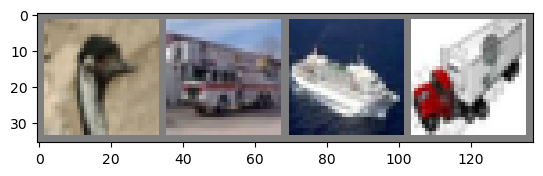

bird  truck ship  truck


In [4]:
#Showing some samples from the dataset the dataset

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x



In [23]:
#Train the model

def train(net, loss_fn, optimizer, trainloader,  epochs = 5):

  for e in range(epochs):

    running_loss = 0.0
    loop = tqdm(trainloader)
    for data in loop: 
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()

      outputs = net(inputs)

      loss = loss_fn(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss+= loss.item()

      loop.set_description(f'epoch = {e},\tloss={running_loss / 2000:.3f}\t')

def accuracy(net, loader):
  correct = 0
  total = 0

  with torch.no_grad():
    for data in loader:
      inputs, labels = data[0].to(device), data[1].to(device)
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  return correct / total


In [24]:
net = Net()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

epoch = 4,	loss=6.562	: 100%|██████████| 12500/12500 [01:12<00:00, 171.45it/s]


train accuracy =  0.65422
test accuracy =  0.5996


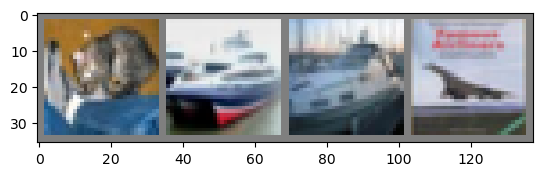

GroundTruth:  cat   ship  ship  plane


In [12]:
#Print the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [13]:
print(labels)
print(len(testloader))

tensor([3, 8, 8, 0])
2500


# Part 2: Trying different parameters and evaluate the result

# Experiment 1:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 6,kernel = 5)
2.  Conv2(input = 6, output = 16,kernel = 5)
3.  Fully Connected Lyaer(input = 400, output = 120)
4.  Fully Connected Lyaer(input = 120, output = 84)
5.  Fully Connected Lyaer(input = 84, output = 10)

• Activation function: relu

• Optimizer: Adam 

• Learning rate: 0.00001

• Accuracy on training set: 40%

• Accuracy on validation set: 40%


In [26]:
#using lr = 0.1, momentum = 0.1
net = Net()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 1e-5)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

  0%|          | 0/12500 [00:00<?, ?it/s]

epoch = 4,	loss=10.358	: 100%|██████████| 12500/12500 [01:13<00:00, 169.73it/s]


train accuracy =  0.40172
test accuracy =  0.4028


# Experiment 2:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 6,kernel = 5)
2.  Conv2(input = 6, output = 16,kernel = 5)
3.  Fully Connected Lyaer(input = 400, output = 120)
4.  Fully Connected Lyaer(input = 120, output = 84)
5.  Fully Connected Lyaer(input = 84, output = 10)

• Activation function: relu

• Optimizer: Adam

• Learning rate: 0.01

• Accuracy on training set: 10%

• Accuracy on validation set: 10%


In [27]:
#using lr = 0.01, weight decay = 0.5 using Adam Optimizer
net = Net()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, weight_decay = 0.5)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

epoch = 4,	loss=14.392	: 100%|██████████| 12500/12500 [01:11<00:00, 175.16it/s]


train accuracy =  0.1
test accuracy =  0.1


# Experiment 3:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 6,kernel = 3)
2.  Conv2(input = 6, output = 16,kernel = 3)
2.  Conv2(input = 16, output = 32 ,kernel = 3)
3.  Fully Connected Layer(input = 288, output = 120)
4.  Fully Connected Layer(input = 120, output = 84)
5.  Fully Connected Layer(input = 84, output = 10)

• Activation function: relu

• Optimizer: SGD

• Learning rate: 0.001

• Accuracy on training set: 60%

• Accuracy on validation set: 57%

In [36]:
class Net1(nn.Module):
  def __init__(self):
    super().__init__()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv1 = nn.LazyConv2d(6, 3)
    self.conv2 = nn.LazyConv2d(16, 3)
    self.conv3 = nn.LazyConv2d(32, 3)
    self.fc1 = nn.LazyLinear(120)
    self.fc2 = nn.LazyLinear(84)
    self.fc3 = nn.LazyLinear(10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

#input size = 3,32,3
net = Net1()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
train(net, loss_fn, optimizer, trainloader)

train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

epoch = 4,	loss=7.122	: 100%|██████████| 12500/12500 [01:16<00:00, 162.90it/s]


train accuracy =  0.6018
test accuracy =  0.5723


# Part 3: Using Optuna to tune the model

In [ ]:
!pip install optuna

In [37]:
import optuna
from optuna.trial import TrialState

In [39]:
def model():

  layers = []

  layers.append(nn.Conv2d(3,6,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))
  layers.append(nn.Conv2d(6,16,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))
  layers.append(nn.Flatten())
  layers.append(nn.LazyLinear(120))
  layers.append(nn.ReLU())
  layers.append(nn.LazyLinear(84))
  layers.append(nn.ReLU())
  layers.append(nn.LazyLinear(10))

  return nn.Sequential(*layers)

net = model()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

c:\Users\nguye\anaconda3\envs\torch\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
epoch = 4,	loss=6.268	: 100%|██████████| 12500/12500 [01:14<00:00, 168.79it/s]


train accuracy =  0.67494
test accuracy =  0.6247


In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Running with DEVICE=', device)

def define_model(trial):

  layers = []
  output1 = trial.suggest_int('conv2d_layer_1_output', 4, 32, 4)
  layers.append(nn.Conv2d(3,output1,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))

  output2 = trial.suggest_int('conv2d_layer_2_output', 16, 64, 16)
  layers.append(nn.LazyConv2d(output2,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))

  layers.append(nn.Flatten())

  fc_output1 = trial.suggest_int('fc_output_1', 128, 512, 128)
  layers.append(nn.LazyLinear(fc_output1))
  layers.append(nn.ReLU())
  fc_output2 = trial.suggest_int('fc_output_2', 16, 84, 16)
  layers.append(nn.LazyLinear(fc_output2))
  layers.append(nn.ReLU())
  layers.append(nn.LazyLinear(10))

  return nn.Sequential(*layers)


#Training loop
def train(net, loss_fn, optimizer, trainloader, debug = True, epochs = 5):

  for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()

      outputs = net(inputs)

      loss = loss_fn(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss+= loss.item()

      if debug:
        if i % 2000 == 1999:    # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0

def accuracy(net, loader):
  correct = 0
  total = 0

  with torch.no_grad():
    for data in loader:
      inputs, labels = data[0].to(device), data[1].to(device)
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  return correct / total

def objective(trial):
  model = define_model(trial).to(device)
  lr = trial.suggest_float('lr', 1e-6, 1e-1, log = True)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr = lr)
  epochs = 5

  for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()

      outputs = net(inputs)

      loss = loss_fn(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss+= loss.item()

      if i % 2000 == 1999:    # print every 2000 mini-batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0

    acc = accuracy(model, testloader)
    print(f'epoch={epoch}, accuracy = {acc}')
    trial.report(acc, epoch)

    if trial.should_prune():
      raise optuna.exceptions.TrialPruned()

  return acc

#Run the opuna
print('Optimizing with optuna ... ')
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])



[I 2024-03-04 19:19:24,593] A new study created in memory with name: no-name-90dbf99e-d605-407c-886f-07006ade0c19


Running with DEVICE= cuda
Optimizing with optuna ... 


c:\Users\nguye\anaconda3\envs\torch\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [16, 84] and step=16, but the range is not divisible by `step`. It will be replaced by [16, 80].
  warnings.warn(


[1,  2000] loss: 0.919
[1,  4000] loss: 0.935
[1,  6000] loss: 0.891
[1,  8000] loss: 0.924
[1, 10000] loss: 0.924
[1, 12000] loss: 0.924
epoch=0, accuracy = 0.1
[2,  2000] loss: 0.903
[2,  4000] loss: 0.909
[2,  6000] loss: 0.932
[2,  8000] loss: 0.934
[2, 10000] loss: 0.910
[2, 12000] loss: 0.920
epoch=1, accuracy = 0.1
[3,  2000] loss: 0.926
[3,  4000] loss: 0.908
[3,  6000] loss: 0.908
[3,  8000] loss: 0.934
[3, 10000] loss: 0.930
[3, 12000] loss: 0.915
epoch=2, accuracy = 0.1
[4,  2000] loss: 0.942
[4,  4000] loss: 0.902
[4,  6000] loss: 0.928
[4,  8000] loss: 0.915
[4, 10000] loss: 0.921
[4, 12000] loss: 0.914
epoch=3, accuracy = 0.1
[5,  2000] loss: 0.914
[5,  4000] loss: 0.924
[5,  6000] loss: 0.925
[5,  8000] loss: 0.919
[5, 10000] loss: 0.930
[5, 12000] loss: 0.909


[I 2024-03-04 19:23:35,488] Trial 0 finished with value: 0.1 and parameters: {'conv2d_layer_1_output': 20, 'conv2d_layer_2_output': 16, 'fc_output_1': 128, 'fc_output_2': 64, 'lr': 5.402066140353269e-06}. Best is trial 0 with value: 0.1.


epoch=4, accuracy = 0.1
[1,  2000] loss: 0.914
[1,  4000] loss: 0.904
[1,  6000] loss: 0.932
[1,  8000] loss: 0.930
[1, 10000] loss: 0.916
[1, 12000] loss: 0.927
epoch=0, accuracy = 0.0963
[2,  2000] loss: 0.907
[2,  4000] loss: 0.922
[2,  6000] loss: 0.907
[2,  8000] loss: 0.905
[2, 10000] loss: 0.942
[2, 12000] loss: 0.925
epoch=1, accuracy = 0.0963
[3,  2000] loss: 0.933
[3,  4000] loss: 0.909
[3,  6000] loss: 0.926
[3,  8000] loss: 0.913
[3, 10000] loss: 0.914
[3, 12000] loss: 0.922
epoch=2, accuracy = 0.0963
[4,  2000] loss: 0.922
[4,  4000] loss: 0.907
[4,  6000] loss: 0.905
[4,  8000] loss: 0.921
[4, 10000] loss: 0.931
[4, 12000] loss: 0.923
epoch=3, accuracy = 0.0963
[5,  2000] loss: 0.914
[5,  4000] loss: 0.919
[5,  6000] loss: 0.925
[5,  8000] loss: 0.913
[5, 10000] loss: 0.920
[5, 12000] loss: 0.923


[I 2024-03-04 19:27:43,876] Trial 1 finished with value: 0.0963 and parameters: {'conv2d_layer_1_output': 24, 'conv2d_layer_2_output': 16, 'fc_output_1': 256, 'fc_output_2': 80, 'lr': 0.0035798137721225563}. Best is trial 0 with value: 0.1.


epoch=4, accuracy = 0.0963
[1,  2000] loss: 0.911
[1,  4000] loss: 0.923
[1,  6000] loss: 0.922
[1,  8000] loss: 0.935
[1, 10000] loss: 0.936
[1, 12000] loss: 0.899
epoch=0, accuracy = 0.1
[2,  2000] loss: 0.906
[2,  4000] loss: 0.923
[2,  6000] loss: 0.897
[2,  8000] loss: 0.932
[2, 10000] loss: 0.948
[2, 12000] loss: 0.911
epoch=1, accuracy = 0.1
[3,  2000] loss: 0.923
[3,  4000] loss: 0.928
[3,  6000] loss: 0.921
[3,  8000] loss: 0.921
[3, 10000] loss: 0.904
[3, 12000] loss: 0.932
epoch=2, accuracy = 0.1
[4,  2000] loss: 0.925
[4,  4000] loss: 0.946
[4,  6000] loss: 0.909
[4,  8000] loss: 0.917
[4, 10000] loss: 0.906
[4, 12000] loss: 0.916
epoch=3, accuracy = 0.1
[5,  2000] loss: 0.905
[5,  4000] loss: 0.923
[5,  6000] loss: 0.926
[5,  8000] loss: 0.896
[5, 10000] loss: 0.944
[5, 12000] loss: 0.924


[I 2024-03-04 19:31:46,153] Trial 2 finished with value: 0.1 and parameters: {'conv2d_layer_1_output': 28, 'conv2d_layer_2_output': 48, 'fc_output_1': 128, 'fc_output_2': 32, 'lr': 0.00416600784050929}. Best is trial 0 with value: 0.1.


epoch=4, accuracy = 0.1
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:


AttributeError: 'Study' object has no attribute 'best_tria'

In [41]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1
  Params: 
    conv2d_layer_1_output: 20
    conv2d_layer_2_output: 16
    fc_output_1: 128
    fc_output_2: 64
    lr: 5.402066140353269e-06


# Best model tuned by Optuna:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 20,kernel = 5)
2.  Conv2(input = 20, output = 16,kernel = 5)
3.  Fully Connected Layer(output = 128)
4.  Fully Connected Layer(output = 64)
5.  Fully Connected Layer(output = 10)

• Activation function: relu

• Optimizer: SGD

• Learning rate: 0.1

• Accuracy on training set: 10%

• Accuracy on validation set: 10%

In [42]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv1 = nn.LazyConv2d(20, 5)
    self.conv2 = nn.LazyConv2d(16, 5)
    self.fc1 = nn.LazyLinear(128)
    self.fc2 = nn.LazyLinear(64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

c:\Users\nguye\anaconda3\envs\torch\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


[1,  2000] loss: 2.364
[1,  4000] loss: 2.358
[1,  6000] loss: 2.362
[1,  8000] loss: 2.360
[1, 10000] loss: 2.364
[1, 12000] loss: 2.359
[2,  2000] loss: 2.362
[2,  4000] loss: 2.362
[2,  6000] loss: 2.364
[2,  8000] loss: 2.359
[2, 10000] loss: 2.360
[2, 12000] loss: 2.358
[3,  2000] loss: 2.359
[3,  4000] loss: 2.359
[3,  6000] loss: 2.363
[3,  8000] loss: 2.358
[3, 10000] loss: 2.363
[3, 12000] loss: 2.363
[4,  2000] loss: 2.364
[4,  4000] loss: 2.362
[4,  6000] loss: 2.357
[4,  8000] loss: 2.355
[4, 10000] loss: 2.359
[4, 12000] loss: 2.365
[5,  2000] loss: 2.361
[5,  4000] loss: 2.357
[5,  6000] loss: 2.353
[5,  8000] loss: 2.356
[5, 10000] loss: 2.362
[5, 12000] loss: 2.363
train accuracy =  0.1
test accuracy =  0.1


# References:

https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html